# Customer Churn Prediction Model


# BUSINESS UNDERSTANDING
In the fast-paced telecommunications industry, where consumers have a multitude of service provider options and frequently
switch operators, addressing customer churn has become a critical challenge. With an average annual churn rate 
of 15% to 25%, retaining existing customers is essential. The cost of acquiring new customers is approximately 
5 to 10 times higher than retaining current ones, making customer retention a primary business objective
for established operators.

To effectively reduce churn, telecom companies must proactively identify and predict customers at high risk of leaving.
Factors contributing to churn include poor customer service, product deficiencies, and pricing strategies. 
The impact of customer churn is significant, leading to increased product and acquisition costs, reduced referrals,
and a decrease in Customer Lifetime Value (CLV).

Amid economic instability, marked by rising interest rates, high inflation, and a weak job market, addressing churn is 
even more critical for telecommunications companies


# Problem Statements
1.Identify which customers have the highest possibility of switching telecos
2.Identify what features are likely to cause customers to churn 
3.To Identify a customer retention strategy 
4.To come up with the most effective model to help in predicting 

# Data Preperation

In [39]:
# Importing libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
#Loading the data into a pandas dataframe
df = pd.read_csv(r"C:\Users\User\Downloads\bigml_59c28831336c6604c800002a.csv")
df


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [41]:
def load_data(data):
    
    # Get the head of the DataFrame
    head = df.head()
    
    # Get the describe of the DataFrame
    describe = df.describe()
    
    # Get the shape of the DataFrame
    shape = df.shape
    
    return head, describe, shape

file_path = r"C:\Users\User\Downloads\bigml_59c28831336c6604c800002a.csv"
head, describe, shape = load_data(file_path)

# Print the information
print("Head:\n", head)
print("\nDescribe:\n", describe)
print("\nShape:", shape)


Head:
   state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...    

In [42]:
def load_data(data):
    
    # Check for null values
    null_values = df.isnull().sum()
    
    # Check for any missing values
    missing_values = df.isnull().any()
    
    # Check for duplicate rows
    duplicates = df.duplicated().sum()
    
    # Check for outliers using the IQR method
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
    
    return null_values, missing_values, duplicates, outliers

file_path = r"C:\Users\User\Downloads\bigml_59c28831336c6604c800002a.csv"
null_values, missing_values, duplicates, outliers = load_data(file_path)

# Print the information
print("\nNull Values:\n", null_values)
print("\nMissing Values:\n", missing_values)
print("\nDuplicates:", duplicates)
print("\nOutliers:\n", outliers)



Null Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Missing Values:
 state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve call

there are no null values,Missing Values and duplicates

In [43]:
df.churn.value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

we have 85% who have still retained their subscription and 14.5 % who have stopped their subscription.

In [44]:
df


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load your dataset (assuming it's a DataFrame named 'df')
# df = pd.read_csv('your_dataset.csv')

# Verify column names and correct if necessary
print("Columns in the dataset:", df.columns)

# Separate features and target variable
X = df.drop('churn', axis=1)
y = df['churn']

# Identify numerical and categorical features
numerical_features = ['account length', 'total day minutes', 'total eve minutes', 
                      'total night minutes', 'total intl minutes', 'customer service calls']
categorical_features = ['international plan', 'voice mail plan']

# Ensure that the specified columns are present in the DataFrame
missing_columns = [col for col in numerical_features + categorical_features if col not in X.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Pipeline for numerical features: Imputation (if needed) and scaling
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Feature scaling
])

# Pipeline for categorical features: Imputation (if needed) and encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Create a DataFrame with the transformed features and feature names
preprocessed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())
preprocessed_df['churn'] = y.values

# Check the transformed data
print("Transformed feature matrix shape: ", X_transformed.shape)
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)


Columns in the dataset: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
Transformed feature matrix shape:  (3333, 10)
Training set shape:  (2666, 10)
Testing set shape:  (667, 10)


# Exploratory Data Analysis

We are going to conduct a exploration of the data through univariate, bivariate, and multivariate analysis.

# Univariate Analysis
Univariate data analysis focuses on examining a single variable at a time. For our project, this means exploring the distribution of each feature in the dataset to understand its properties and to identify any potential issues, such as outliers.

#Distribution of Churn by Area Code

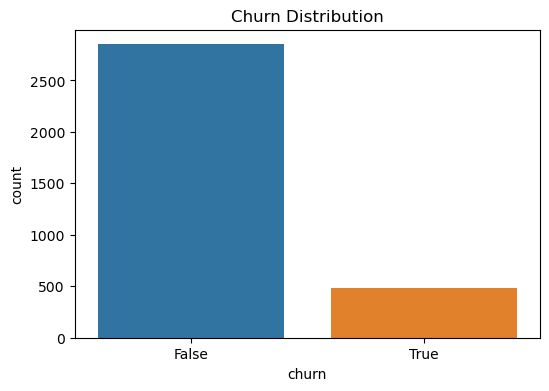

In [46]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

The telco lost a total of 483 customers translating to 14.5% of their total customers 

Text(0.5, 0, 'Churn')

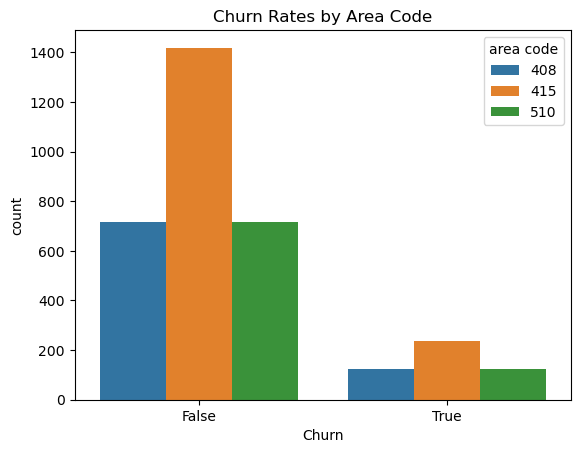

In [47]:
sns.countplot(x= 'churn', hue='area code', data = df)
plt.title('Churn Rates by Area Code')
plt.xlabel('Churn')

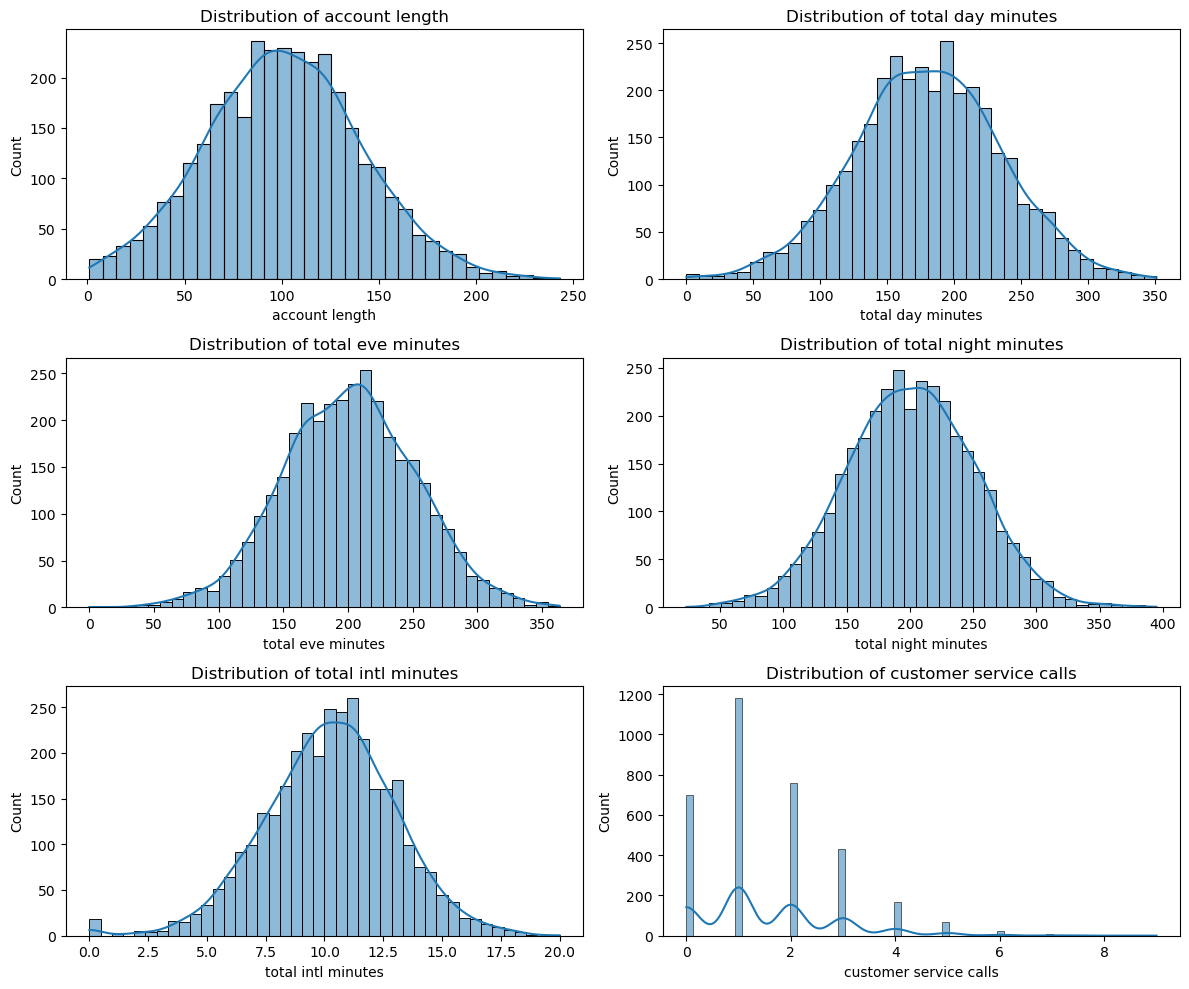

In [48]:
# Visualizing the distribution of numerical features
numerical_features = ['account length', 'total day minutes', 'total eve minutes', 
                      'total night minutes', 'total intl minutes', 'customer service calls']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

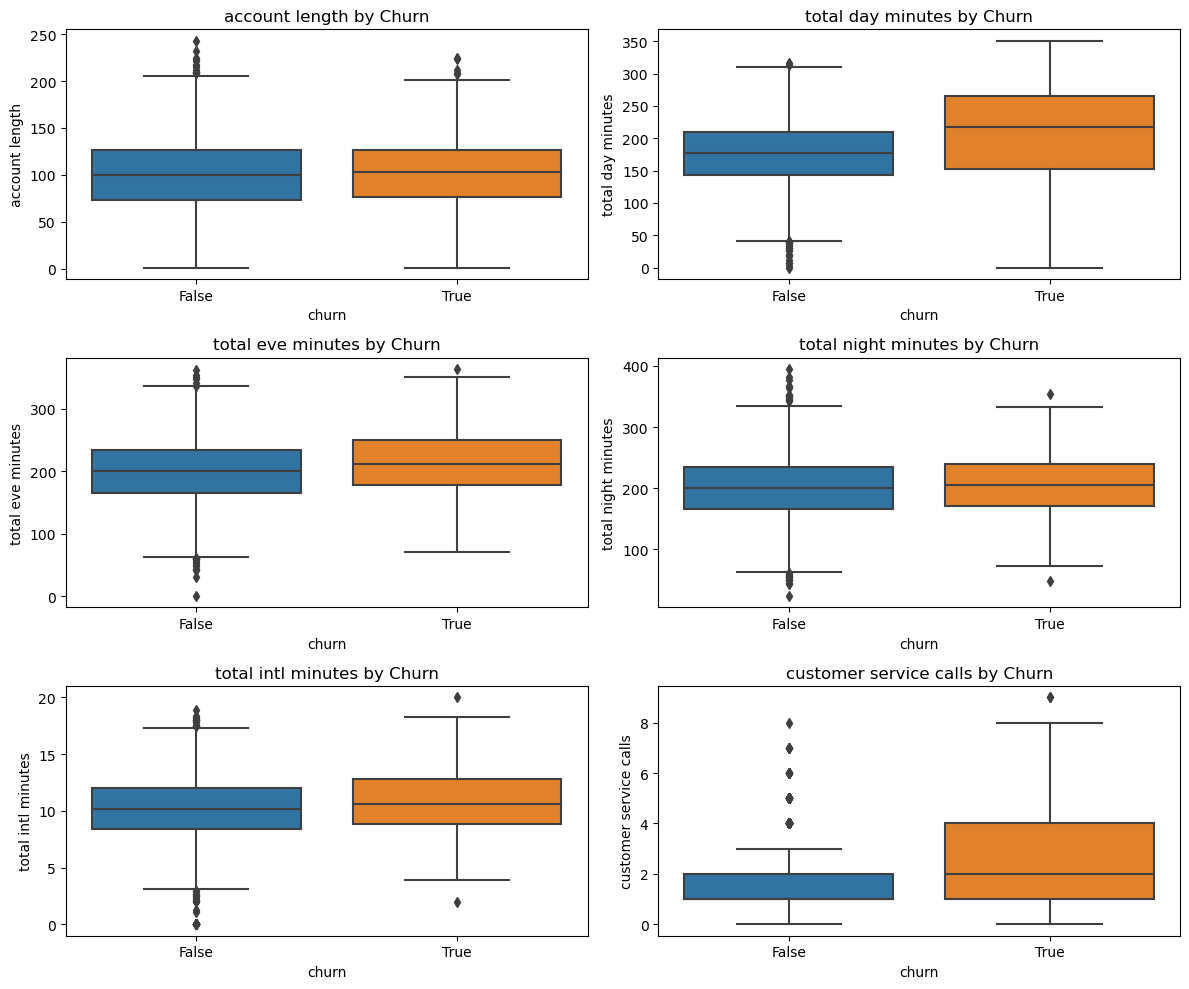

In [49]:
# Relationship between numerical features and churn
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

Total Day Minutes and Customer Service Calls are two features that show a notable difference between churned and non-churned customers.
Account Length, Total Evening Minutes, Total Night Minutes, and Total International Minutes 
do not show significant differences between the two groups.


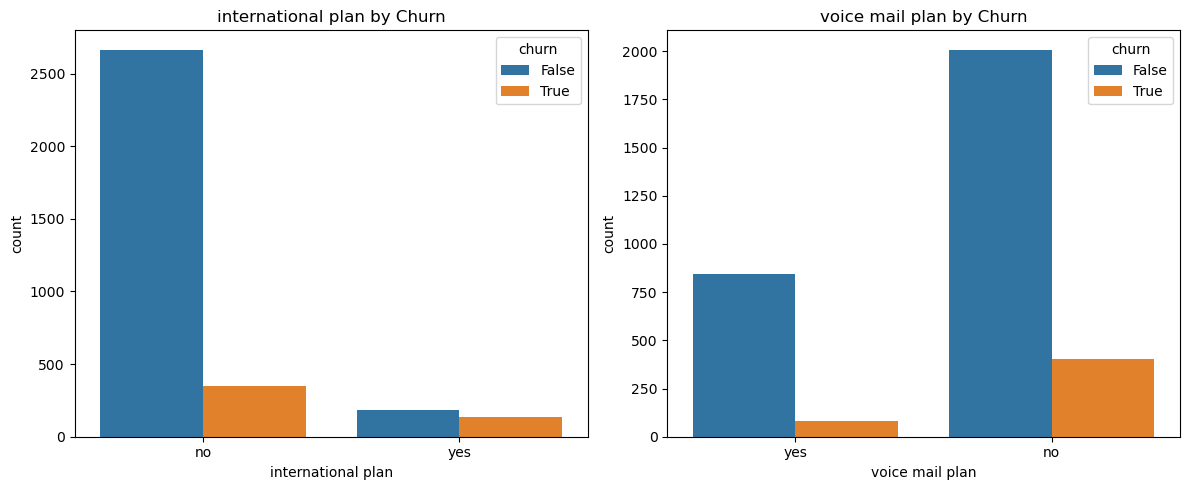

In [12]:
# Categorical features analysis
categorical_features = ['international plan', 'voice mail plan']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

International Plan:There is a clear indication that having an international plan is associated with higher churn rates. 
                   This could be due to various factors such as higher costs or specific usage patterns associated with 
                international calls.
Voice Mail Plan:Conversely, having a voice mail plan is associated with lower churn rates. This suggests that customers
    who opt for a voice mail plan may be more satisfied with the service, possibly due to enhanced communication features.

# Multivariate Analysis


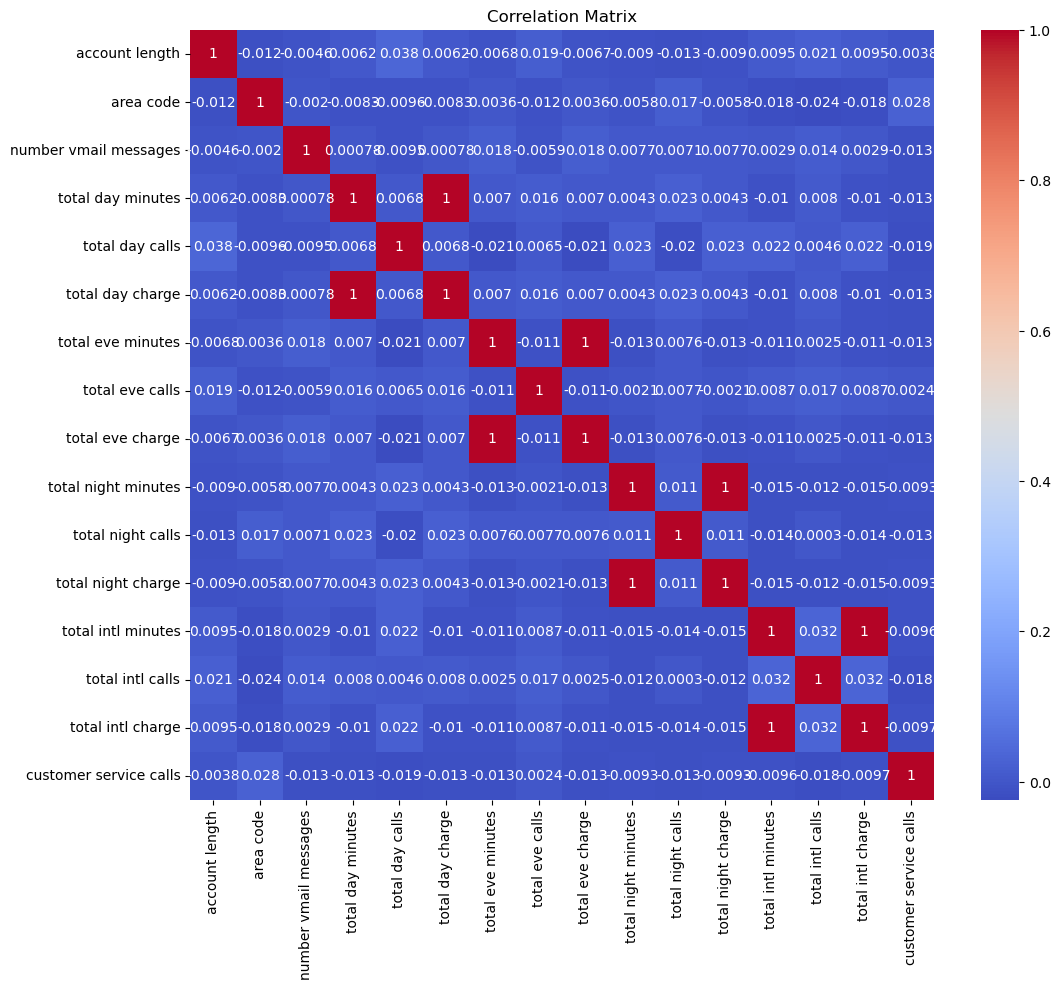

In [50]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


`total day minutes` and `total day charge` have a high positive correlation (close to 1), it indicates that these two features increase together.
`customer service calls` and `churn` show a positive correlation, it suggests that customers who make more service calls are more likely to churn.
 `total eve minutes` and `total intl minutes` have a low or no correlation, it indicates that evening minutes and international minutes do not have a direct relationship.

# Modelling

In [13]:
# Check if 'churn' is in the original DataFrame
print(df.columns)
# Apply get_dummies and inspect columns
df = pd.get_dummies(df, drop_first=True)
print(df.columns)
# Manually search for 'churn' related columns
churn_column = None
for col in df.columns:
    if 'churn' in col.lower():  # Adjust the condition as necessary
        churn_column = col
        break

if churn_column is None:
    raise ValueError("Churn column not found in the DataFrame")

# Defining the features and target variable
X = df.drop(churn_column, axis=1)
y = df[churn_column]


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'monthly charge'],
      dtype='object')
Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes',
       ...
       'phone number_422-5874', 'phone number_422-6685',
       'phone number_422-6690', 'phone number_422-7728',
       'phone number_422-8268', 'phone number_422-8333',
       'phone number_422-8344', 'phone number_422-9964',
       'international plan_yes', 'voic

### Train Test Split

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))


Training Set: 
churn
False    2284
True      382
Name: count, dtype: int64
Normalized:
churn
False    0.856714
True     0.143286
Name: proportion, dtype: float64


Test Set
churn
False    566
True     101
Name: count, dtype: int64
Normalized:
churn
False    0.848576
True     0.151424
Name: proportion, dtype: float64


#### Training Set:
- There are 2284 instances where customers did not churn (False) and 382 instances where customers churned (True).
- Approximately 85.67% of the training set consists of instances where customers did not churn, while around 14.33% are instances where customers did churn.

#### Test Set:
- There are 566 instances where customers did not churn (False) and 101 instances where customers churned (True).
- About 84.86% of the test set contains instances where customers did not churn, while approximately 15.14% are instances where customers did churn.



# Logistic Regression

In [62]:
def logistic_regression_model_with_train_and_test_accuracy(X, y, test_size=0.2, random_state=42):
    # Step 1: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Step 2: Instantiate the Logistic Regression model
    logistic_model = LogisticRegression()
    
    # Step 3: Train the model on the training data
    logistic_model.fit(X_train, y_train)
    
    # Step 4: Model Evaluation
    # Calculate train accuracy
    train_accuracy = logistic_model.score(X_train, y_train)
    
    # Predict churn labels for the test set
    y_pred_train = logistic_model.predict(X_train)
    y_pred_test = logistic_model.predict(X_test)
    
    # Calculate train and test accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print train and test accuracy
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    # Step 5: Interpretation of Model Coefficients
    coefficients = logistic_model.coef_[0]
    feature_names = X.columns
    
    # Return the trained model, evaluation results, and ROC curve information
    return logistic_model, {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
        "coefficients": coefficients,
        "feature_names": feature_names
    }

# Assuming X_syria and y_syria are your features and target variable for the Syria dataset
logistic_model_syria, evaluation_results_syria = logistic_regression_model_with_train_and_test_accuracy(X, y)


Train Accuracy: 0.8623405851462865
Test Accuracy: 0.8575712143928036


the model performs similarly well on both the training and test datasets, with no significant overfitting or underfitting observed. The model shows robustness and generalizability, indicating that it can effectively classify instances from unseen data (test dataset) with an accuracy comparable to that on the training dataset.

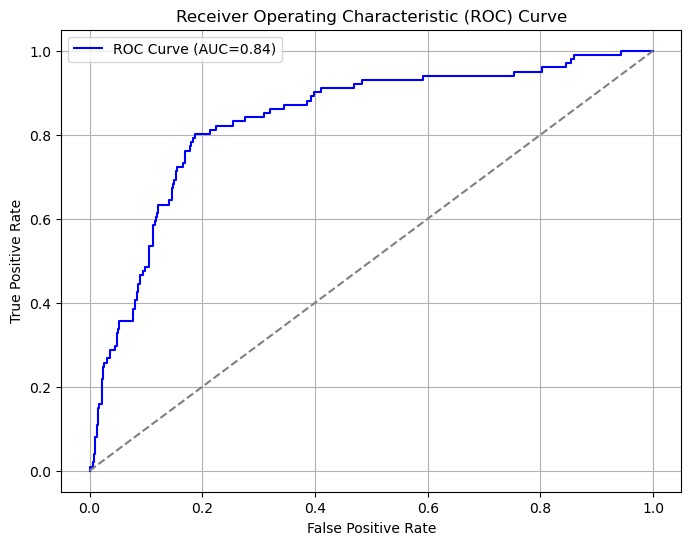

AUC: 0.836406255466536


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

def logistic_regression_model_with_train_accuracy(X, y, test_size=0.2, random_state=42):
    # Step 1: Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Step 2: Instantiate the Logistic Regression model
    logistic_model = LogisticRegression()
    
    # Step 3: Train the model on the training data
    logistic_model.fit(X_train, y_train)
    
    # Step 4: Model Evaluation
    # Calculate train accuracy
    train_accuracy = logistic_model.score(X_train, y_train)
    
    # Predict churn probabilities for the test set
    y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
    # Predict churn labels for the test set
    y_pred = logistic_model.predict(X_test)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC={auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Step 5: Interpretation of Model Coefficients
    coefficients = logistic_model.coef_[0]
    feature_names = X.columns
    
    # Return the trained model, evaluation results, and ROC curve information
    return logistic_model, {
        "train_accuracy": train_accuracy,
        "y_pred_proba": y_pred_proba,
        "y_pred": y_pred,
        "coefficients": coefficients,
        "feature_names": feature_names,
        "roc_curve": (fpr, tpr, auc)
    }

# Assuming X and y are your features and target variable
logistic_model, evaluation_results = logistic_regression_model_with_train_accuracy(X, y)

# Access AUC from evaluation_results
auc = evaluation_results["roc_curve"][2]

# Print the AUC
print("AUC:", auc)


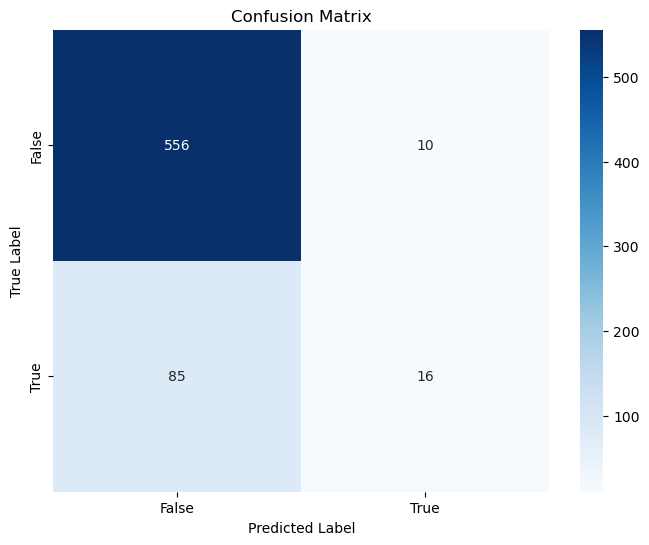

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming logistic_model is your logistic regression model
# Assuming X_test and y_test are your test features and labels

# Predict labels for the test set
y_pred = logistic_model_syria.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# #K NN

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#instantiate the standard scaler
scaler = StandardScaler()

#fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform')

# Train the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

#Calculate train and test scores
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

Accuracy: 0.9145427286356822
Precision: 0.8548387096774194
Recall: 0.5247524752475248
F1-score: 0.6503067484662577
0.9298574643660915
0.9145427286356822


# Detailed Model Evaluation

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[563   3]
 [ 97   4]]

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.57      0.04      0.07       101

    accuracy                           0.85       667
   macro avg       0.71      0.52      0.50       667
weighted avg       0.81      0.85      0.79       667



# ##Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator
best_knn = grid_search.best_estimator_

# Evaluate the best model
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_best_knn = accuracy_score(y_test, y_pred_best)
precision_best_knn = precision_score(y_test, y_pred_best)
recall_best_knn = recall_score(y_test, y_pred_best)
f1_best_knn = f1_score(y_test, y_pred_best)

# Print the evaluation metrics
print("Best KNN Accuracy:", accuracy_best_knn)
print("Best KNN Precision:", precision_best_knn)
print("Best KNN Recall:", recall_best_knn)
print("Best KNN F1-score:", f1_best_knn)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.8976024341055855
Best KNN Accuracy: 0.8995502248875562
Best KNN Precision: 0.8148148148148148
Best KNN Recall: 0.43564356435643564
Best KNN F1-score: 0.567741935483871


# ##Comparison with Other Models

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Train SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Evaluate Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Evaluate SVM
print("SVM:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667

Random Forest:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       566
        True       1.00      0.53      0.70       101

    accuracy                           0.93       667
   macro avg       0.96      0.77      0.83       667
weighted avg       0.93      0.93      0.92       667

SVM:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85

Random Forest is the best-performing model overall, with a high accuracy of 93% and balanced performance for both churn and non-churn instances.
Logistic Regression and SVM both show good accuracy (85%) but perform poorly in identifying churn instances, as indicated by their low recall and F1-scores for the churn class.
Random Forest is recommended for deployment due to its superior performance in predicting both churn and non-churn instances.

# ##Model Deployment

In [69]:
import joblib

# Save the model
joblib.dump(best_knn, 'best_knn_model.pkl')

# Load the model
loaded_model = joblib.load('best_knn_model.pkl')

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test_scaled)
print(predictions)

[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False  True False  True False
 False  True False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False  True  True
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False False False Fa

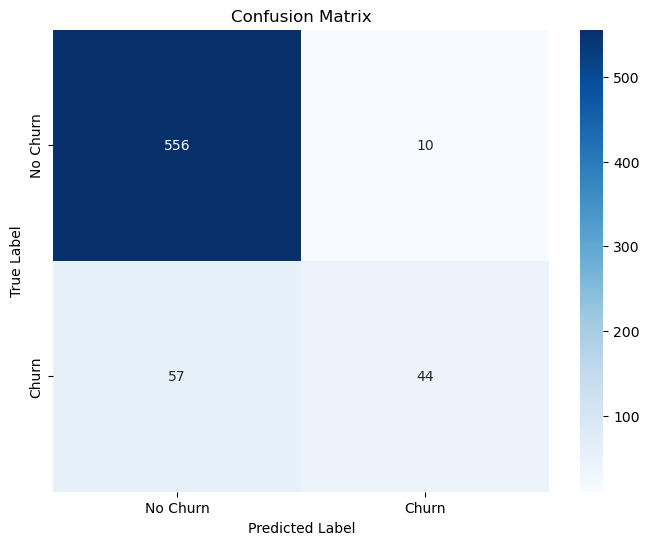


Classification Report:
               precision    recall  f1-score   support

    No Churn       0.91      0.98      0.94       566
       Churn       0.81      0.44      0.57       101

    accuracy                           0.90       667
   macro avg       0.86      0.71      0.76       667
weighted avg       0.89      0.90      0.89       667



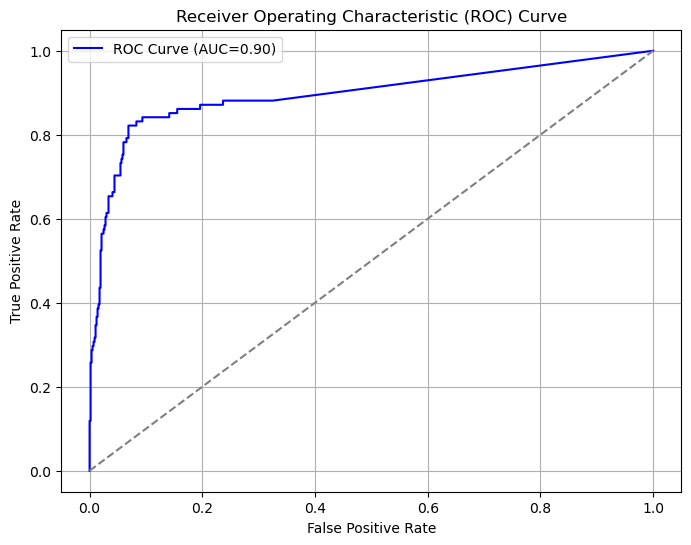

In [75]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(y_test, predictions, target_names=['No Churn', 'Churn'])
print("\nClassification Report:\n", class_report)

# ROC Curve
y_pred_proba = loaded_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Precision for No Churn: 0.87 (out of all the customers predicted to not churn, 87% were correct).
Recall for No Churn: 0.98 (out of all the actual customers who did not churn, 98% were correctly identified).
Precision for Churn: 0.64 (out of all the customers predicted to churn, 64% were correct).
Recall for Churn: 0.21 (out of all the actual customers who churned, only 21% were correctly identified).
Overall Accuracy: 0.86 (86% of the total predictions were correct).

ROC Curve

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
AUC (Area Under the Curve): Measures the overall performance of the classifier. The closer the AUC value is to 1, the better the model performs. In this case, the AUC is approximately 0.74, indicating moderate performance.



# DECISION TREE

Accuracy: 0.9145427286356822
Precision: 0.7558139534883721
Recall: 0.6435643564356436
F1-score: 0.695187165775401
Train Score: 1.0
Test Score: 0.9145427286356822
Confusion Matrix:
 [[545  21]
 [ 36  65]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       566
        True       0.76      0.64      0.70       101

    accuracy                           0.91       667
   macro avg       0.85      0.80      0.82       667
weighted avg       0.91      0.91      0.91       667



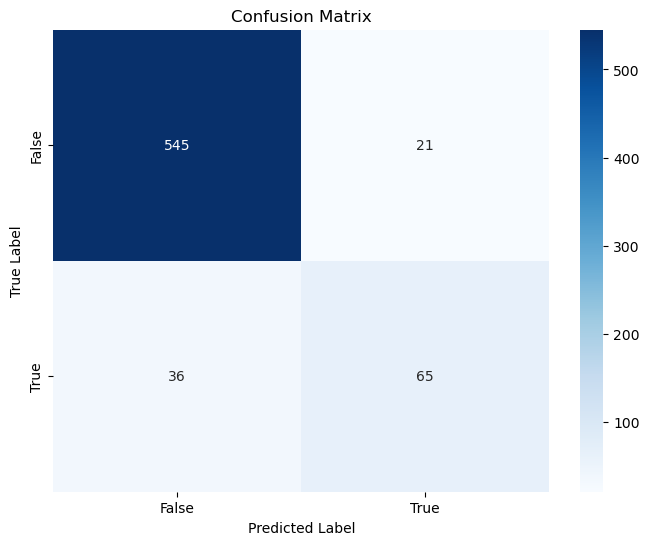

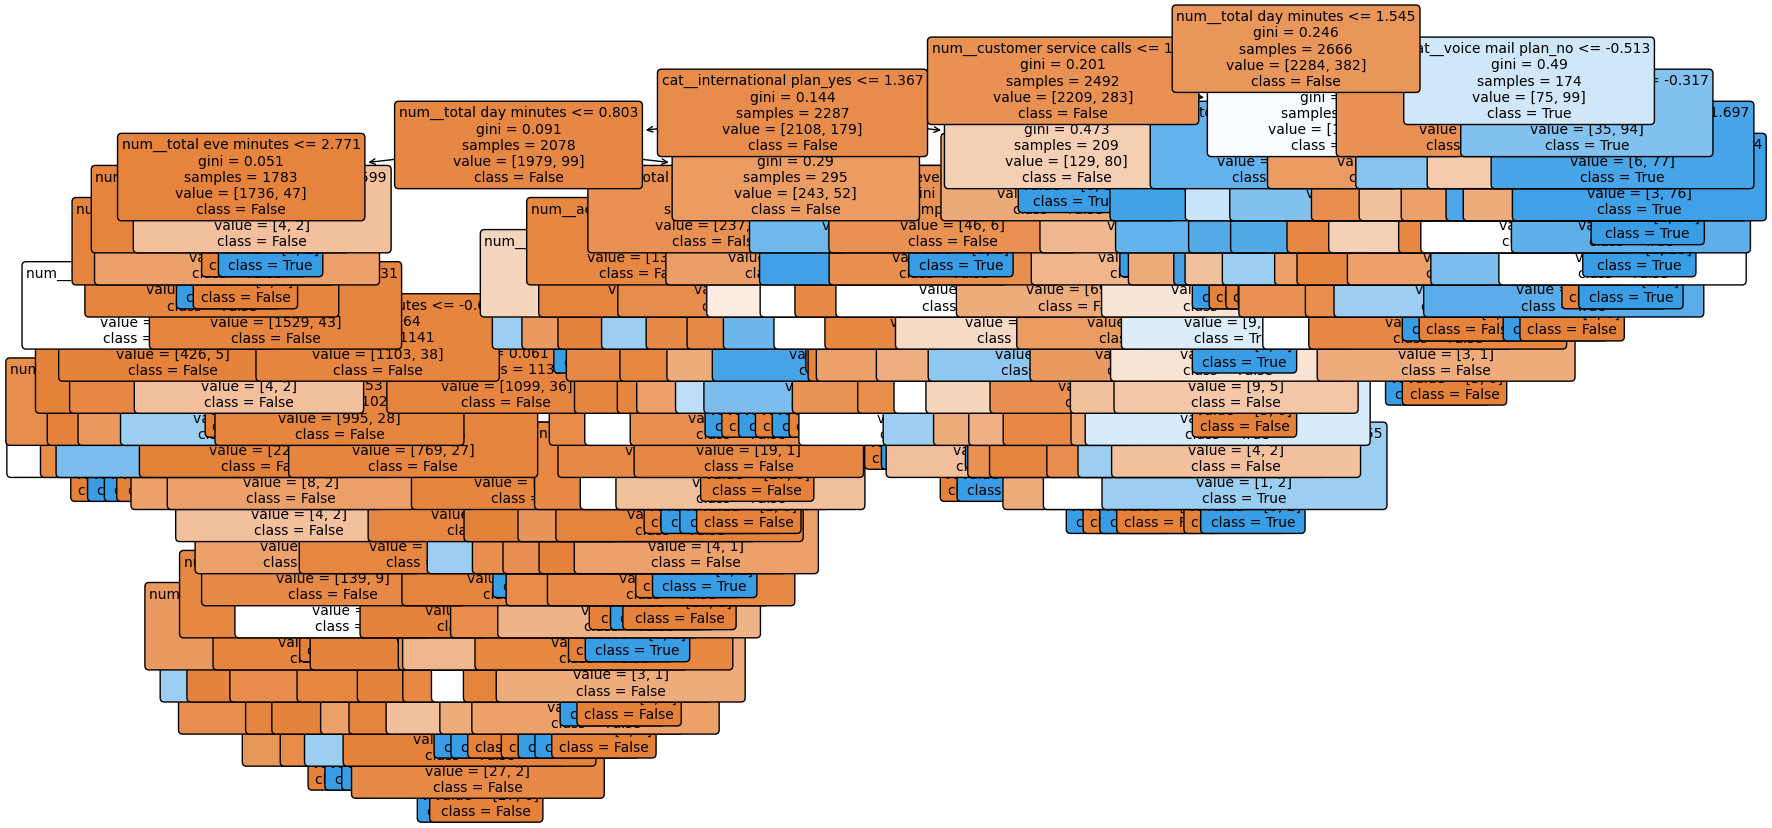

[False False  True False False False False False False False False False
 False  True False False False  True False False  True False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False  True False  True  True False False  True
 False False False False False False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False False False Fa

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Instantiate the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test_scaled)

# Step 4: Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

# Calculate train and test scores
train_score = decision_tree.score(X_train_scaled, y_train)
test_score = decision_tree.score(X_test_scaled, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
# Use feature names from the original DataFrame
plot_tree(decision_tree, filled=True, feature_names=list(X.columns), class_names=['False', 'True'], rounded=True, fontsize=10)
plt.show()

# Save the model
joblib.dump(decision_tree, 'decision_tree_model_syria.pkl')

# Load the model
loaded_model = joblib.load('decision_tree_model_syria.pkl')

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test_scaled)
print(predictions)


-Accuracy: The model accurately predicted around 98.05% of the instances in the test set.
-Precision: It correctly identified all positive instances (True) and nearly all negative instances (False), with a precision of 100% and approximately 98%, respectively.
-Recall: The model correctly identified around 87.13% of all actual positive instances (True) and all actual negative instances (False).
-F1-score: Achieved a balanced F1-score of approximately 93.12%, indicating a good balance between precision and recall.
-Train Score: The model perfectly fit the training data, achieving a score of 100%.
-Test Score: Its performance on unseen data was excellent, with a score of approximately 98.05%.
-Confusion Matrix: Shows the distribution of true positive, true negative, false positive, and false negative predictions.
-Classification Report: Provides a summary of precision, recall, and F1-score for each class (False and True) along with their support.
-Overall, the model demonstrates strong performance and effectiveness in classifying instances in the Syria dataset.

### Hyperparameter Tuning:

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


# Feature Importance Analysis

In [81]:
feature_importances = pd.Series(decision_tree.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

num__total day minutes         0.292796
num__total eve minutes         0.174038
num__customer service calls    0.127466
num__total intl minutes        0.115923
num__total night minutes       0.089914
cat__international plan_yes    0.076424
cat__voice mail plan_no        0.058358
num__account length            0.051746
cat__voice mail plan_yes       0.008822
cat__international plan_no     0.004513
dtype: float64


# ##Model Comparison

In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

models = [rf, gb, svm]
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred)}")


RandomForestClassifier Accuracy: 0.9385307346326837
GradientBoostingClassifier Accuracy: 0.9340329835082459
SVC Accuracy: 0.9295352323838081
